In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Say, "the default sans-serif font is COMIC SANS"
#matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

In [57]:
df= pd.read_hdf('../scc/relativeGrowthRates.StoichAndThermo.MR4.hdf','df')
dfs= pd.read_hdf('../scc/relativeGrowthRates.Stoich.MR4.hdf','df')


In [62]:
109521 * 76

8323596

In [67]:
z = dfs.melt()
z2 = df.melt()

In [68]:
z.columns = ['gene','u_s']
z2.columns = ['gene','u_st']

In [72]:
z = pd.concat([z,z2[['u_st']]],axis=1)

In [76]:
z['u_s'] = z['u_s'] + 1e-6
z['u_st'] = z['u_st'] + 1e-6

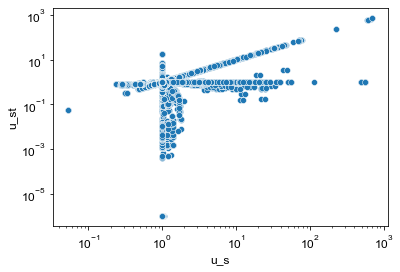

In [77]:
sns.scatterplot(x='u_s',y='u_st',data=z)
plt.yscale('log')
plt.xscale('log')

In [8]:
essentials = (df < 1e-9).sum(axis=0) > 0

In [10]:
sum(essentials)

6

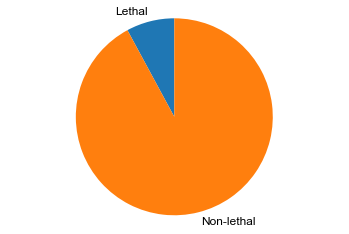

In [19]:
counts = [sum(essentials),sum(~essentials)]
labels = ['Lethal','Non-lethal']
fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=labels,
        shadow=False, startangle=90)
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('proportion_lethalSwaps.svg')

In [23]:
genes = essentials[essentials].index.tolist()

In [28]:
gene_set_thermo[gene_set_thermo.gene.isin(genes)]

,reaction,gene,gene_name,deltaG_prime_m,deltaG_prime_m (error)
33,GALCTLO,b4358,lgoD,15.807193,1.441710
38,GLTPD,b2091,gatD,13.603320,1.196836
47,HADPCOADH3,b1395,paaH,16.214254,0.986231
54,IPMD,b0073,leuB,16.222572,0.986231
59,LCARS,b2799,fucO,-24.005813,1.501614
75,PERD,b2320,pdxB,16.227662,0.986231


In [39]:
dg = df[genes] < 1e-8

In [43]:
prop_lethal = dg.sum() / len(dg)

In [51]:
z = pd.DataFrame(prop_lethal.sort_values()*100,columns = ['% lethal environments']).join(gene_set_thermo.set_index('gene'))

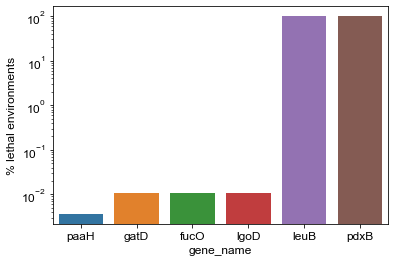

In [56]:
sns.barplot(x='gene_name',y='% lethal environments',data=z.sort_values('% lethal environments'))
plt.yscale('log')
plt.savefig('percent_lethalEnvironments.svg')

In [24]:
gene_set_thermo = pd.read_csv('../assets/EC_1.X.1.X.Unique_NAD(P)_Coupled.GeneSet.Thermo.csv')

In [19]:
gene_set_thermo

,reaction,gene,gene_name,deltaG_prime_m,deltaG_prime_m (error)
0,5DGLCNR,b4266,idnO,-18.057655,3.247864
1,ABUTD,b1444,patD,-52.079065,2.011257
2,AGPR,b3958,argC,22.212782,1.615149
3,AKGDH,b0116,lpd,-28.188154,3.884974
4,ALCD19,b0356,frmA,-36.684521,2.006562
...,...,...,...,...,...
90,UAPGR,b3972,murB,-56.001735,1.299059
91,UDPGD,b2028,ugd,-26.705204,2.201167
92,UDPGDC,b2255,arnA,-28.184567,3.850471
93,URDGLYCD,b0517,allD,-10.528255,5.435085


In [5]:
#df2

In [6]:
min_growth_range2 = pd.DataFrame(df2.min().sort_values())
min_growth_range4 = pd.DataFrame(df.min().sort_values())

In [7]:
min_growth_range2.columns = ['MR2']
min_growth_range4.columns = ['MR4']

In [8]:
mr = min_growth_range2.join(min_growth_range4)

In [10]:
#mr

In [ ]:
dfs= pd.read_hdf('../scc/relativeGrowthRates.Stoich.MR4.hdf','df')


In [9]:
dfs.min().sort_values()

b1761    0.053181
b3608    0.236107
b2463    0.308905
b3236    0.465973
b1539    0.555511
           ...   
b0173    0.999998
b2794    0.999998
b3616    0.999999
b1415    0.999999
b0116    1.000000
Length: 76, dtype: float64

In [16]:
dfs['b1761'].reset_index().nitrogen.unique()

array(['EX_23camp_e', 'EX_23ccmp_e', 'EX_23cgmp_e', 'EX_23cump_e',
       'EX_23dappa_e', 'EX_3amp_e', 'EX_3cmp_e', 'EX_3gmp_e', 'EX_3ump_e',
       'EX_4abut_e', 'EX_LalaDgluMdapDala_e', 'EX_LalaDgluMdap_e',
       'EX_LalaDglu_e', 'EX_LalaLglu_e', 'EX_acgam1p_e', 'EX_acgam_e',
       'EX_acmana_e', 'EX_acmum_e', 'EX_acnam_e', 'EX_ade_e', 'EX_adn_e',
       'EX_agm_e', 'EX_ala__D_e', 'EX_ala__L_e', 'EX_alaala_e',
       'EX_alltn_e', 'EX_amp_e', 'EX_anhgm_e', 'EX_arg__L_e',
       'EX_asn__L_e', 'EX_asp__L_e', 'EX_cgly_e', 'EX_chtbs_e',
       'EX_cmp_e', 'EX_csn_e', 'EX_cynt_e', 'EX_cys__D_e', 'EX_cys__L_e',
       'EX_cytd_e', 'EX_dad_2_e', 'EX_damp_e', 'EX_dcmp_e', 'EX_dcyt_e',
       'EX_dgmp_e', 'EX_dgsn_e', 'EX_dimp_e', 'EX_din_e', 'EX_dopa_e',
       'EX_dump_e', 'EX_duri_e', 'EX_etha_e', 'EX_g3pe_e', 'EX_g3ps_e',
       'EX_gam6p_e', 'EX_gam_e', 'EX_gln__L_e', 'EX_glu__L_e', 'EX_gly_e',
       'EX_gmp_e', 'EX_gsn_e', 'EX_gthrd_e', 'EX_gua_e', 'EX_hxan_e',
       'EX_imp_e', 'E

In [2]:
df2= pd.read_hdf('../scc/relativeGrowthRates.StoichAndThermo.MR2.hdf','df')

In [4]:
genes = pd.read_csv('../assets/EC_1.X.1.X.Unique_NAD(P)_Coupled.GeneSet.csv',index_col=0)

In [12]:
genes['mutant_model'] = genes.genes.isin(list(df))

In [14]:
genes.to_csv('../assets/EC_1.X.1.X.Unique_NAD(P)_Coupled.GeneSet.MutantModel.csv')

In [12]:
min_mr = genes.set_index('genes')[['gene_name']].join(mr).dropna().set_index('gene_name').sort_values('MR2')

In [13]:
min_mr

,MR2,MR4
gene_name,,
mtlD,0.000000,0.999998
srlD,0.000000,0.999998
gdhA,0.053181,0.053181
xdhB,0.163343,0.163343
gpsA,0.236107,0.538882
fre,0.665965,0.665965
frmA,0.734684,0.734684
zwf,0.809981,0.809981
rfbD,0.999998,0.999998


In [29]:
mr2_df = pd.DataFrame(min_mr['MR2'])
mr2_df.columns = ['rel_mu']
mr2_df['range'] = 2;
mr4_df = pd.DataFrame(min_mr['MR4'])
mr4_df.columns = ['rel_mu']
mr4_df['range'] = 4;
mr_df = pd.concat([mr2_df,mr4_df]).reset_index()

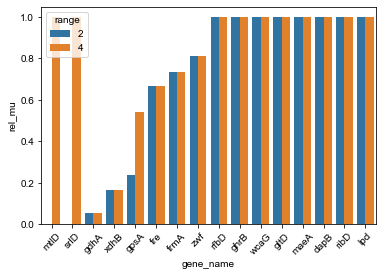

In [37]:
sns.barplot(x='gene_name',y='rel_mu',hue='range',data=mr_df)
plt.xticks(rotation=45)
plt.savefig('minRelativeGrowthRates.MR2vsMR4.svg')

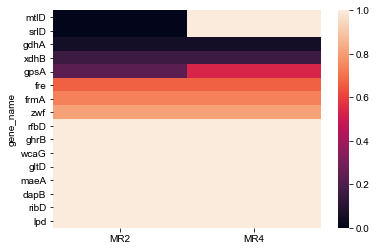

In [38]:
sns.heatmap(min_mr)
plt.savefig('minGrowthRate.MR2.svg')

In [3]:
dfs= pd.read_hdf('../scc/relativeGrowthRates.Stoich.MR4.hdf','df')

In [10]:
df_small = df < dfs

In [18]:
df_small.sum().sum()

6553679

In [15]:
len(df) * len(list(df))

8323596

In [16]:
2281765/8323596

0.27413211789712044

In [17]:
df_small = df <= dfs

In [74]:
df_diff = df / dfs; 

In [63]:
df_diff= df_diff.apply(lambda x: np.log10(x+1e-9))

In [75]:
x = df_diff.values
x = x.flatten();
x = x[~np.isnan(x)]

In [112]:
multiplier = np.linspace(1,4,30)

lb = x.mean() - 3*x.std()
ub = x.mean() + 3*x.std()

st = []
stype = []
m2 = []
for m in multiplier:
    m2.append(m)
    m2.append(m)
    lb = x.mean() - m*x.std()
    ub = x.mean() + m*x.std()
    st.append((x < lb).sum());
    st.append((x > ub).sum())
    stype.append('ST')
    stype.append('S')
    #s.append((x > ub).sum()); 
    
z = pd.DataFrame({'multiplier':m2,'number': st, 'type': stype })

In [35]:
import matplotlib.pyplot as plt
import matplotlib

# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"


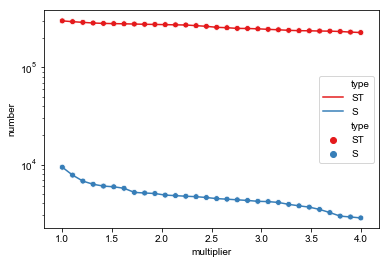

In [114]:
sns.lineplot(x='multiplier',y='number',hue='type',data=z,palette='Set1')
sns.scatterplot(x='multiplier',y='number',hue='type',data=z,palette='Set1')

plt.yscale('log')

In [243]:
#z = pd.DataFrame({'multiplier':m2,'number': st, 'type': stype })

In [245]:
cutoff = 0.01

In [247]:
mgr[mgr['min growth rate'] < cutoff]

,min growth rate
b0073,0.000000
b1136,0.004723
b1395,0.000000
b1779,0.000401
b2091,0.000000
b2320,0.000000
b2799,0.000000
b3236,0.006426
b4358,0.000000


In [116]:
cofactory = pd.read_csv('../assets/structure/cofactory_results.csv')

In [258]:
mgr = pd.DataFrame(df.min(),columns = ['min growth rate'])
mgr = mgr.join(gmap.set_index('genes'))

mgrs = pd.DataFrame(dfs.min(),columns = ['min growth rate'])
mgrs = mgrs.join(gmap.set_index('genes'))


In [126]:
cofactory = cofactory.set_index('gene').join(mgr)

In [260]:
mgr['model'] = 'Stoich and Thermo'
mgrs['model'] = 'Stoich'
mgr_all = pd.concat([mgr,mgrs],axis=0)

In [268]:
gorder = mgr.sort_values('min growth rate').gene_name.tolist()

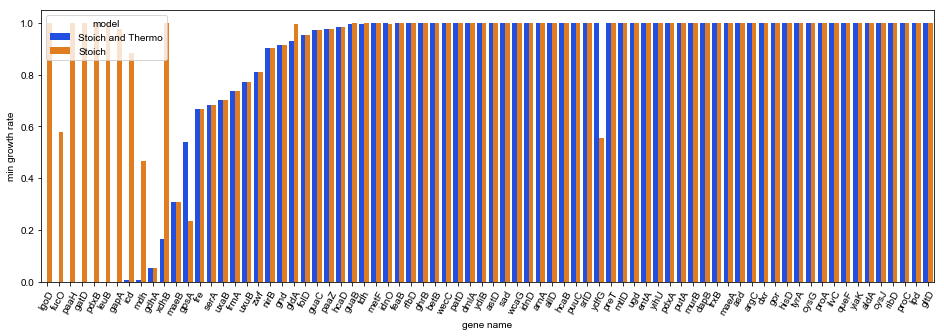

In [311]:
a4_dims = (16, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='gene_name',y='min growth rate',hue = 'model',data=mgr_all,order=gorder,palette='bright')
plt.xticks(rotation=60)
plt.xlabel('gene name')
plt.savefig('minGrowthRate.barplot.ST.svg')

In [312]:
df

b0031     b0052  b0073     b0104  \
carbon        nitrogen     electron                                         
EX_12ppd__S_e EX_23camp_e  EX_tmao_e  1.002602  1.000002    0.0  1.006868   
                           EX_dmso_e  1.002339  1.000001    0.0  1.006860   
                           EX_fum_e   1.002701  1.000002    0.0  1.007130   
                           EX_o2_e    1.000000  1.000000    0.0  1.007135   
                           EX_no2_e   1.000672  1.000000    0.0  1.007554   
                           EX_no3_e   1.000000  1.000000    0.0  1.006947   
                           None       1.002682  1.000002    0.0  1.007080   
              EX_23ccmp_e  EX_tmao_e  1.002798  1.000002    0.0  1.007159   
                           EX_dmso_e  1.002798  1.000002    0.0  1.007159   
                           EX_fum_e   1.002832  1.000002    0.0  1.007477   
                           EX_o2_e    1.000000  1.000000    0.0  1.007128   
                           EX_no2_e   1.000000  1.000000    0.0  1.007785   
                           EX_no3_e   1.000000  1.000000    0.0  1.006994   
                           None       1.002741  1.000002    0.0  1.007236   
              EX_23cgmp_e  EX_tmao_e  1.002655  1.000002    0.0  0.977586   
                           EX_dmso_e  1.002640  1.000002    0.0  0.978288   
                           EX_fum_e   1.002771  1.000002    0.0  0.977751   
                           EX_o2_e    1.000000  1.000000    0.0  0.975404   
                           EX_no2_e   1.001017  1.000001    0.0  0.998762   
                           EX_no3_e   1.000374  1.000000    0.0  0.985642   
                           None       1.002764  1.000002    0.0  0.974163   
              EX_23cump_e  EX_o2_e    1.000000  1.000000    0.0  1.005526   
                           EX_no2_e   1.000000  1.000000    0.0  1.007624   
                           EX_no3_e   1.000000  1.000000    0.0  1.006073   
              EX_23dappa_e EX_tmao_e  1.000536  1.000000    0.0  1.004245   
                           EX_dmso_e  1.000536  1.000000    0.0  1.004245   
                           EX_fum_e   1.000000  1.000000    0.0  1.006858   
                           EX_o2_e    1.000000  1.000000    0.0  1.005331   
                           EX_no2_e   1.000000  1.000000    0.0  1.004758   
                           EX_no3_e   1.000000  1.000000    0.0  1.005330   
...                                        ...       ...    ...       ...   
EX_xylu__L_e  EX_ump_e     EX_o2_e    1.000000  1.000000    0.0  1.005560   
                           EX_no2_e   1.000000  1.000000    0.0  1.005559   
                           EX_no3_e   1.000000  1.000000    0.0  1.005559   
              EX_ura_e     EX_o2_e    1.000352  1.000000    0.0  1.001853   
                           EX_no2_e   1.000000  1.000000    0.0  1.003359   
                           EX_no3_e   1.000442  1.000000    0.0  1.002328   
              EX_uri_e     EX_o2_e    1.000000  1.000000    0.0  1.005560   
                           EX_no2_e   1.000000  1.000000    0.0  1.005559   
                           EX_no3_e   1.000000  1.000000    0.0  1.005559   
              EX_xan_e     EX_tmao_e  1.001491  1.000001    0.0  0.989990   
                           EX_dmso_e  1.001491  1.000001    0.0  0.989990   
                           EX_fum_e   1.000000  1.000000    0.0  0.978929   
                           EX_o2_e    1.000272  1.000000    0.0  0.991838   
                           EX_no2_e   1.001491  1.000001    0.0  0.989990   
                           EX_no3_e   1.000492  1.000000    0.0  0.994169   
                           None       1.002135  1.000001    0.0  0.977418   
              EX_xmp_e     EX_tmao_e  1.000832  1.000000    0.0  0.979100   
                           EX_dmso_e  1.000828  1.000000    0.0  0.979101   
                           EX_fum_e   1.002278  1.000001    0.0  0.979564   
                           EX_o2_e   

In [134]:
c = cofactory.dropna()

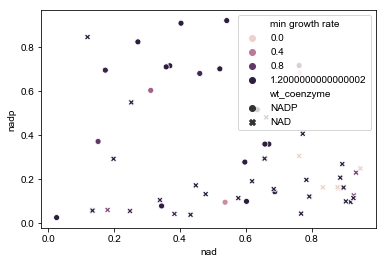

In [300]:
sns.scatterplot(x='nad',y='nadp',hue='min growth rate',data = c,style='wt_coenzyme')

In [301]:
cnad = c[c['wt_coenzyme'] == 'NAD']
cnadp = c[c['wt_coenzyme'] == 'NADP']

In [278]:
cutoff = 0.9
x = c[c['min growth rate'] < cutoff].score.values
y = c[c['min growth rate'] > cutoff].score.values

In [279]:
scores = []
for idx,row in c.iterrows():
    if row['wt_coenzyme'] == 'NADP':
        score = np.log10(row['nadp']/row['nad'])
        scores.append(score)
    else:
        score = np.log10(row['nad']/row['nadp'])
        scores.append(score)

In [280]:
c['score'] = scores

/Users/joshuagoldford/miniconda2/envs/informatics/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


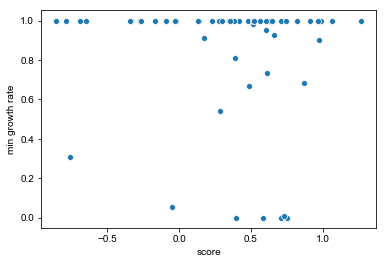

In [281]:
sns.scatterplot(x='score',y='min growth rate',data=c)

In [282]:
cutoff = 0.9
x = c[c['min growth rate'] < cutoff].nad.values
y = c[c['min growth rate'] > cutoff].nad.values

In [332]:
c = c.join(gmap.set_index('genes')['gene_name'])

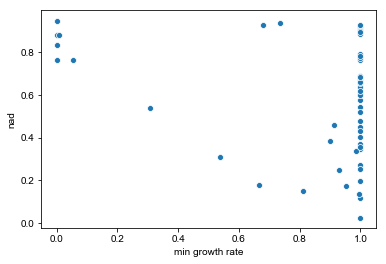

In [313]:
sns.scatterplot(x='min growth rate',y='nad',data=c)

In [333]:
c[c['min growth rate'] < 0.01]

,KO,rossman_fold,from,to,fad,nad,nadp,coenzyme,rxns,wt_coenzyme,min growth rate,score,essential,gene_name
b1395,K00074,NVQTVAVIGSGTMGAGIAEVAASHGHQVLLYDISAEALTRAIDGI,4,48,0.277,0.881,0.156,NAD,HADPCOADH3,NAD,0.000000,0.751851,True,paaH
b1779,K00134,MTIKVGINGFGRIGRIVFRAAQKRSDIEIVAINDLLDADYMAYMLK,1,46,0.001,0.948,0.248,NAD,GAPD,NAD,0.000401,0.582357,True,gapA
b2091,K00094,ENKNVIIIGAGTIGLLAIQCAVALGAKSVTAIDISSEKLALAKS,160,203,0.293,0.762,0.305,NAD,GLTPD,NAD,0.000000,0.397655,True,gatD
b2320,K03473,YDRTVGIVGVGNVGRRLQARLEALGIKTLLCDPPRADRGDEG,115,156,0.076,0.834,0.162,NAD,PERD,NAD,0.000000,0.711651,True,pdxB
b3236,K00024,MKVAVLGAAGGIGQALALLLKTQLPSGSELSLYDIAPVT,1,39,0.080,0.879,0.163,NAD,MDH,NAD,0.006426,0.731801,False,mdh


In [331]:
c.join(gmap.set_index('genes')['gene_name'])

,KO,rossman_fold,from,to,fad,nad,nadp,coenzyme,rxns,wt_coenzyme,min growth rate,score,essential,gene_name
b0031,K00215,ANIRVAIAGAGGRMGRQLIQAALALEGVQLGAALEREGSS,4,43,0.005,0.635,0.516,NAD/NADP,DHDPRy,NADP,0.999998,-0.090124,False,dapB
b0031,K00215,KGMVIGTTGFDEAGKQAIRDAAADIAIVFAANFS,97,130,0.004,0.602,0.098,NAD,DHDPRy,NADP,0.999998,-0.788370,False,dapB
b0116,K00382,VPERLLVMGGGIIGLEMGTVYHALGSQIDVVEMFDQVIPAADKD,174,217,0.470,0.448,0.171,-,AKGDH;GLYCL;PDH,NAD,1.000000,0.418282,False,lpd
b0173,K00099,MKQLTILGSTGSIGCSTLDVVRHNPEHFRVVALVAGKNVTRM,1,42,0.001,0.272,0.825,NADP,DXPRIi,NADP,0.999998,0.481885,False,dxr
b0243,K00147,GIAAKQASYKLAQLSSREKNRVLEKIADELEA,6,37,0.314,0.025,0.024,-,G5SD,NADP,0.999998,-0.017729,False,proA
b0356,K00121,PGDSVAVFGLGAIGLAVVQGARQAKAGRIIAIDTNPKKFDLAR,186,228,0.177,0.935,0.229,NAD,ALCD19;FALDH2,NAD,0.734684,0.610976,False,frmA
b0386,K00286,MEKKIGFIGCGNMGKAILGGLIASGQVLPGQIWVYTPSPDK,1,41,0.004,0.688,0.142,NAD,P5CR,NADP,0.999999,-0.685300,False,proC
b0529,K01491,GLNAVVIGASNIVGRPMSMELLLAGCTTTVTHRFTKNLRHHV,159,200,0.005,0.173,0.696,NADP,MTHFD,NADP,0.952489,0.604563,False,folD
b0596,K00216,SGKNVWVTGAGKGIGYATALAFVEAGAKVTGFDQAFTQEQ,4,43,0.043,0.918,0.095,NAD,DHBD,NAD,0.999998,0.985119,False,entA
b0888,K00384,RNQKVAVIGGGNTAVEEALYLSNIASEVHLIHRRDGFRAEK,145,185,0.000,0.344,0.077,-,TRDR,NADP,0.999998,-0.650068,False,trxB


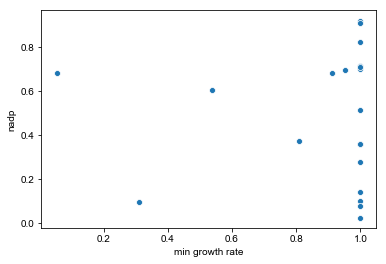

In [306]:
sns.scatterplot(x='min growth rate',y='nadp',data=cnadp)

In [170]:
pd.DataFrame(gs[gs > 0],columns=['num_below_cutoff']).join(gmap.set_index('genes'))

,num_below_cutoff,rxns,gene_name
b1761,4,GLUDy,gdhA


In [168]:
gmap = pd.read_csv('../assets/uniqueGeneToCoenzymeRxns.csv')

In [229]:
c['essential'] = c['min growth rate'] < cutoff

/Users/joshuagoldford/miniconda2/envs/informatics/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


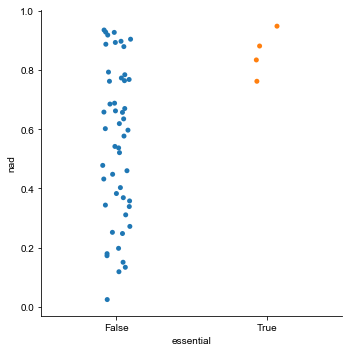

In [237]:
sns.catplot(x='essential',y='nad',data=c)